In [1]:
import pandas as pd

unemployment_path = r"/Users/huiminlin/Downloads/Cleaned_Unemployment.xlsx"

df_unemployment = pd.read_excel(unemployment_path)

# Renaming the columns by removing the prefix 'Unemployed_' if it exists, otherwise keeping the original column names
df_unemployment = df_unemployment.rename(columns=lambda x: x.replace('Unemployed_', '') if 'Unemployed_' in x else x)

df_unemployment


,FIPS_Code,State,Area_Name,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,24000,MD,Maryland,98961,118836,137390,138058,132925,131621,124396,...,204282,179106,156905,135091,129316,124150,113048,210055,168222,102813
1,24001,MD,Allegany County,1929,2171,2222,2232,2310,2340,2158,...,2829,2489,2209,1949,1807,1740,1622,2357,1817,1253
2,24003,MD,Anne Arundel County,8013,9705,11451,11141,10866,10510,10065,...,16749,14839,12976,11149,10716,10282,9448,17764,13722,8892
3,24005,MD,Baltimore County,15005,17759,20477,20966,19835,19504,18226,...,30143,26484,23076,19947,18982,17904,16349,29779,23252,14672
4,24009,MD,Calvert County,1203,1365,1590,1667,1669,1706,1609,...,2805,2477,2118,1820,1746,1733,1546,2493,2068,1455
5,24011,MD,Caroline County,548,744,779,868,814,769,762,...,1214,1074,935,813,749,683,636,953,768,526
6,24013,MD,Carroll County,2470,2850,3385,3473,3380,3312,3242,...,5066,4385,3849,3262,3107,3038,2725,4654,3636,2511
7,24015,MD,Cecil County,1598,1881,2263,2642,2294,2489,2406,...,3992,3407,3088,2652,2466,2296,2061,3044,2532,1789
8,24017,MD,Charles County,1905,2185,2559,2593,2609,2701,2551,...,5144,4535,3931,3433,3326,3284,3118,5673,4539,2876
9,24019,MD,Dorchester County,789,1049,1144,1209,1075,1004,1043,...,1544,1305,1110,952,870,793,723,1049,845,575


In [2]:
# Melt the DataFrame from wide format to long format
df_unemployment = pd.melt(df_unemployment, id_vars=['FIPS_Code', 'State', 'Area_Name'], 
                  var_name='Year', value_name='Unemployed')

# Display the transformed DataFrame
print(df_unemployment)


     FIPS_Code State            Area_Name  Year  Unemployed
0        24000    MD             Maryland  2000       98961
1        24001    MD      Allegany County  2000        1929
2        24003    MD  Anne Arundel County  2000        8013
3        24005    MD     Baltimore County  2000       15005
4        24009    MD       Calvert County  2000        1203
..         ...   ...                  ...   ...         ...
570      24041    MD        Talbot County  2022         588
571      24043    MD    Washington County  2022        2401
572      24045    MD      Wicomico County  2022        1965
573      24047    MD     Worcester County  2022        1266
574      24510    MD       Baltimore city  2022       11682

[575 rows x 5 columns]


In [3]:
population_path = r"/Users/huiminlin/Downloads/maryland_population.xlsx"

df_pop = pd.read_excel(population_path)

df_pop

,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,MARYLAND,5296486,5344192.6,5391899.2,5439605.8,5487312.4,5535019.0,5582725.6,5630432.2,5678138.8,...,5815403.6,5857255.2,5899106.8,5940958.4,5982810,6001198,6019586,6037974,6056362,6074750
1,Anne Arundel County,489656,494456.0,499256.0,504056.0,508856.0,513656.0,518456.0,523256.0,528056.0,...,542698.8,547741.6,552784.4,557827.2,562870,566872,570874,574876,578878,582880
2,Baltimore County,754292,759365.7,764439.4,769513.1,774586.8,779660.5,784734.2,789807.9,794881.6,...,809577.2,814125.4,818673.6,823221.8,827770,828278,828786,829294,829802,830310
3,Carroll County,150897,152520.7,154144.4,155768.1,157391.8,159015.5,160639.2,162262.9,163886.6,...,167217.2,167300.4,167383.6,167466.8,167550,167840,168130,168420,168710,169000
4,Harford County,218590,221213.6,223837.2,226460.8,229084.4,231708.0,234331.6,236955.2,239578.8,...,245866.8,246907.6,247948.4,248989.2,250030,251560,253090,254620,256150,257680
5,Howard County,247842,251766.3,255690.6,259614.9,263539.2,267463.5,271387.8,275312.1,279236.4,...,292338.0,297591.0,302844.0,308097.0,313350,316278,319206,322134,325062,327990
6,Baltimore City,651154,648134.7,645115.4,642096.1,639076.8,636057.5,633038.2,630018.9,626999.6,...,619930.8,618900.6,617870.4,616840.2,615810,611654,607498,603342,599186,595030
7,Frederick County,195277,199087.8,202898.6,206709.4,210520.2,214331.0,218141.8,221952.6,225763.4,...,235708.0,238031.0,240354.0,242677.0,245000,248956,252912,256868,260824,264780
8,Montgomery County,873341,883184.6,893028.2,902871.8,912715.4,922559.0,932402.6,942246.2,952089.8,...,983875.6,995974.2,1008072.8,1020171.4,1032270,1036214,1040158,1044102,1048046,1051990
9,Prince George's County,801515,807705.5,813896.0,820086.5,826277.0,832467.5,838658.0,844848.5,851039.0,...,871936.0,880452.0,888968.0,897484.0,906000,907028,908056,909084,910112,911140


In [4]:
# Replace 'Region' with the correct column name if needed
df_pop = pd.melt(df_pop, id_vars=['Region'],  # Adjust based on actual column name
                  var_name='Year', value_name='Population')

# Display the transformed DataFrame
print(df_pop)



                  Region  Year  Population
0               MARYLAND  2000   5296486.0
1    Anne Arundel County  2000    489656.0
2       Baltimore County  2000    754292.0
3         Carroll County  2000    150897.0
4         Harford County  2000    218590.0
..                   ...   ...         ...
520        Talbot County  2020     37550.0
521    Dorchester County  2020     32110.0
522      Somerset County  2020     25760.0
523      Wicomico County  2020    104200.0
524     Worcester County  2020     52500.0

[525 rows x 3 columns]


In [5]:


# Assuming df_unemployed contains 'Area_Name' and df_pop contains 'Region'

# Rename 'Region' column in df_pop to 'Area_Name' to match df_unemployed
df_pop.rename(columns={'Region': 'Area_Name'}, inplace=True)

# Merge the two DataFrames based on the 'Area_Name' column
merged_df = pd.merge(df_unemployment, df_pop, on=['Area_Name', 'Year'], how='inner')

# Display the merged DataFrame
print(merged_df)


     FIPS_Code State            Area_Name  Year  Unemployed  Population
0        24001    MD      Allegany County  2000        1929     74930.0
1        24003    MD  Anne Arundel County  2000        8013    489656.0
2        24005    MD     Baltimore County  2000       15005    754292.0
3        24009    MD       Calvert County  2000        1203     74563.0
4        24011    MD      Caroline County  2000         548     29772.0
..         ...   ...                  ...   ...         ...         ...
478      24039    MD      Somerset County  2020         711     25760.0
479      24041    MD        Talbot County  2020        1050     37550.0
480      24043    MD    Washington County  2020        4816    151800.0
481      24045    MD      Wicomico County  2020        3624    104200.0
482      24047    MD     Worcester County  2020        2774     52500.0

[483 rows x 6 columns]


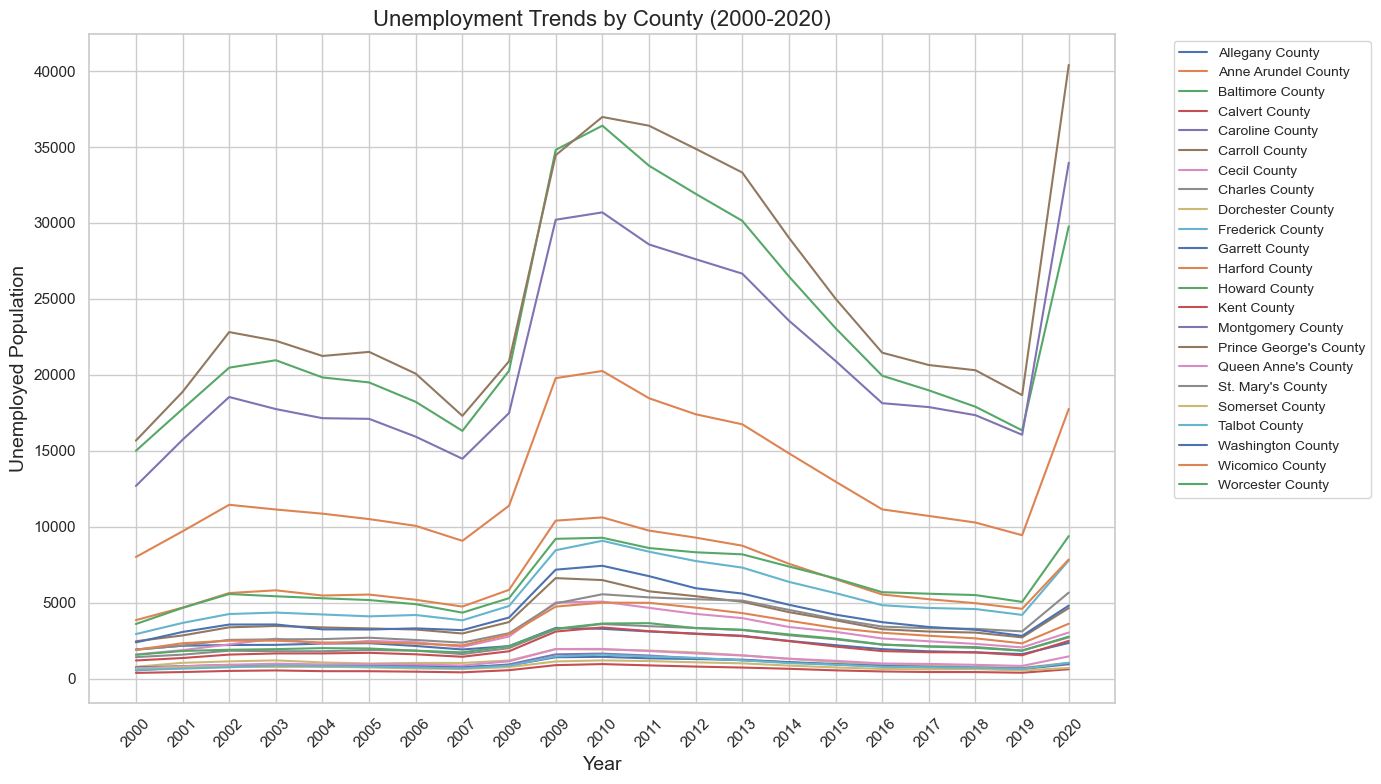

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Plot a line chart to show unemployment trends over time for specific counties
plt.figure(figsize=(14, 8))

# Plot unemployment trends for each county
for county in merged_df['Area_Name'].unique():
    county_data = merged_df[merged_df['Area_Name'] == county]
    plt.plot(county_data['Year'], county_data['Unemployed'], label=county)

plt.title('Unemployment Trends by County (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployed Population', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures the labels fit well
plt.show()





In [7]:
# Calculate the year-over-year percentage change for Unemployment and Population
merged_df['Unemployment_Change_Rate'] = merged_df.groupby('Area_Name')['Unemployed'].pct_change() * 100
merged_df['Population_Growth_Rate'] = merged_df.groupby('Area_Name')['Population'].pct_change() * 100

# Display the updated DataFrame
print(merged_df[['Area_Name', 'Year', 'Unemployed', 'Population', 'Unemployment_Change_Rate', 'Population_Growth_Rate']])


               Area_Name  Year  Unemployed  Population  \
0        Allegany County  2000        1929     74930.0   
1    Anne Arundel County  2000        8013    489656.0   
2       Baltimore County  2000       15005    754292.0   
3         Calvert County  2000        1203     74563.0   
4        Caroline County  2000         548     29772.0   
..                   ...   ...         ...         ...   
478      Somerset County  2020         711     25760.0   
479        Talbot County  2020        1050     37550.0   
480    Washington County  2020        4816    151800.0   
481      Wicomico County  2020        3624    104200.0   
482     Worcester County  2020        2774     52500.0   

     Unemployment_Change_Rate  Population_Growth_Rate  
0                         NaN                     NaN  
1                         NaN                     NaN  
2                         NaN                     NaN  
3                         NaN                     NaN  
4                      

In [8]:
#replace of NaN value with 0
merged_df.fillna(0, inplace=True)

merged_df

,FIPS_Code,State,Area_Name,Year,Unemployed,Population,Unemployment_Change_Rate,Population_Growth_Rate
0,24001,MD,Allegany County,2000,1929,74930.0,0.000000,0.000000
1,24003,MD,Anne Arundel County,2000,8013,489656.0,0.000000,0.000000
2,24005,MD,Baltimore County,2000,15005,754292.0,0.000000,0.000000
3,24009,MD,Calvert County,2000,1203,74563.0,0.000000,0.000000
4,24011,MD,Caroline County,2000,548,29772.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
478,24039,MD,Somerset County,2020,711,25760.0,29.744526,0.038835
479,24041,MD,Talbot County,2020,1050,37550.0,63.043478,-0.026624
480,24043,MD,Washington County,2020,4816,151800.0,70.598654,0.237718
481,24045,MD,Wicomico County,2020,3624,104200.0,55.536481,0.433735


In [9]:
#output merged dataset
output_file = r"/Users/huiminlin/Downloads/merged_file.xlsx"
merged_df.to_excel(output_file, index=False)

In [10]:
#correlation analysis

# Perform correlation analysis between population growth rate and unemployment change rate
correlation = merged_df[['Population_Growth_Rate', 'Unemployment_Change_Rate']].corr()

# Display the correlation result
correlation


,Population_Growth_Rate,Unemployment_Change_Rate
Population_Growth_Rate,1.000000,0.189006
Unemployment_Change_Rate,0.189006,1.000000


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression (dropping rows with missing values)
df_clean = merged_df[['Population_Growth_Rate', 'Unemployment_Change_Rate']].dropna()

# Reshape the data for the regression model
X = df_clean['Population_Growth_Rate'].values.reshape(-1, 1)
y = df_clean['Unemployment_Change_Rate'].values

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Predict the unemployment change rate based on the model
y_pred = model.predict(X)

# Display the regression results
slope, intercept


(6.542310634207773, 0.5310011992500652)

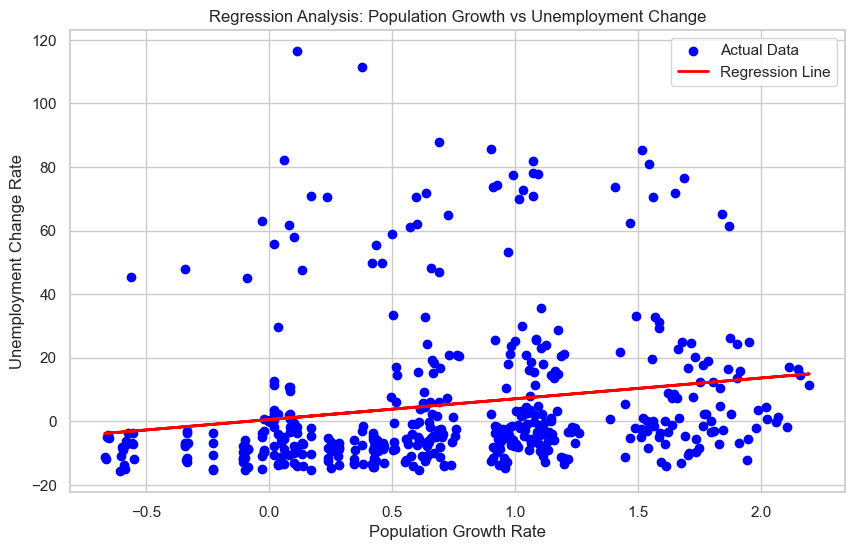

In [12]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Population Growth Rate')
plt.ylabel('Unemployment Change Rate')
plt.title('Regression Analysis: Population Growth vs Unemployment Change')
plt.legend()

# Show the plot
plt.show()


In [13]:
import statsmodels.api as sm

# Add a constant to the independent variable for OLS regression
X_with_const = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X_with_const).fit()

# Generate the detailed regression summary
ols_summary = ols_model.summary()

# Display the summary
ols_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.82
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.90e-05
Time:                        15:50:25   Log-Likelihood:                -2195.2
No. Observations:                 483   AIC:                             4394.
Df Residuals:                     481   BIC:                             4403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5310      1.513      0.351      0.726      -2.441       3.503
x1             6.5423      1.550      4.221      0.000       3.497       9.588
==============================================================================
Omnibus:                      228.382   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.845
Skew:                           2.232   Prob(JB):                    4.80e-190
Kurtosis:                       7.837   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""